In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.tokenize import word_tokenize

In [ ]:
helper_path = "../code/"
sys.path.insert(0, helper_path)

In [ ]:
from New_MissingValue import MissingValue

In [ ]:
# relative path
data_path = "../data/"
data_file_list = ["train.csv","test.csv"]

In [ ]:
# load data
data_train = pd.read_csv(data_path + data_file_list[0])
data_test = pd.read_csv(data_path + data_file_list[1])

# data info
print(f'Training text file: {data_train.shape[0]} rows; {data_train.shape[1]} columns')
print(f'Testing text file: {data_test.shape[0]} rows; {data_test.shape[1]} columns')
data_train.head()

In [ ]:
# check if NaNs exist in training data, and acquire their locations
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)
missing_value_finder_train.missing_value_enumerator()

In [ ]:
# drop this missing row
for obj in missing_value_finder_train.na_index:
    data_train = data_train.drop([obj])

In [ ]:
# check again
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)

In [ ]:
data_train.to_csv('../data/train_no_missingValue.csv')

In [ ]:
# check if NaNs exist in test data, and acquire their locations
missing_value_finder_test = MissingValue(data_test)
missing_value_finder_test.missing_value_summary(verbose=True)

Note:
- Missing value check & elimination finished 

# Data Classification

- Classify the data by their features, and save them into separate csv files, named "Positive.csv", "Negative.csv" and "Neutral.csv"

In [ ]:
def SentiSeparation(data):
    Positive=data[data['sentiment']=='positive']
    Negative=data[data['sentiment']=='negative']
    Neutral=data[data['sentiment']=='neutral']
    Positive.to_csv(r'../data/Positive.csv')
    Negative.to_csv(r'../data/Negative.csv')
    Neutral.to_csv(r'../data/Neutral.csv')

In [ ]:
SentiSeparation(data_train)

# Data Cleaning

Since the data set is too large, running through all the data may take too long. Therefore, only data with feature "positive" is tested at this time.

In [2]:
process_path = "../code/"
sys.path.insert(0, process_path)

In [3]:
from TextPreprocessing import *
from StaAnalysis1 import StaA
import nltk

In [ ]:
Positive=pd.read_csv("../data/Positive/Positive.csv")
Positive=pd.DataFrame(Positive)
Positive.head()

In [ ]:
Positive.head(50)

In [ ]:
Negative=pd.read_csv("../data/Negative/Negative.csv")
Negative=pd.DataFrame(Negative)
Negative.head()

In [ ]:
Neutral=pd.read_csv("../data/Neutral/Neutral.csv")
Neutral=pd.DataFrame(Neutral)
Neutral.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Negative_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Negative,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Neutral_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Neutral,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Positive/Positive_clean_data.csv'
#save2='../data/Positive/Positive_clean_data_2bused.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Positive,feature,save1)
selected_text.head()

In [ ]:
selected_text.head(50)

In [4]:
Overall=pd.read_csv("../data/train_no_missingValue.csv")
Overall=pd.DataFrame(Overall)
Overall.head()
# saving path of the cleaned data
save1='../data/clean_data/Overall.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Overall,feature,save1)
selected_text.head()

../code/TextPreprocessing.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[feature][i] = clean_tweet


KeyboardInterrupt: 

In [ ]:
selected_text.head(10)

In [ ]:
Test=pd.read_csv("../data/test.csv")
Test=pd.DataFrame(Test)
Test.head()
# saving path of the cleaned data
save1='../data/clean_data/Overall_test.csv'
# featured data to be cleaned
feature='text'
# apply the previous function
selected_text=process_to_csv(Test,feature,save1)
selected_text.head()

# Preparation for Statistical Analysis -- Unigram/Multi-gram

Cleaned data are used to do statistical analysis. Due to the large size of the data to be processed, only first 50 sets of data are tested to verify the code.

## Sentiment: "All Training Data"

In [5]:
path='../data/clean_data/Overall.csv'
#path1='../data/clean_data/train_text.csv'
#path2='../data/clean_data/train_word.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(path)

check if unigram works, N=1

In [6]:
split_selected_text[:5]

[['my', 'boss', 'was', 'not', 'happy', 'them', 'lots', 'of', 'fun'],
 ['good'],
 ['says', 'good', 'or', 'should', 'i', 'say', 'bad', 'afternoon'],
 ['i', 'dont', 'think', 'you', 'can', 'vote', 'anymore'],
 ['better']]

In [7]:
split_selected_word[:5]

['my', 'boss', 'was', 'not', 'happy']

In [8]:
n_document

27485

In [9]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/clean_data/train_uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
172.38227796554565


Text(0.5, 1.0, 'tf-idf')

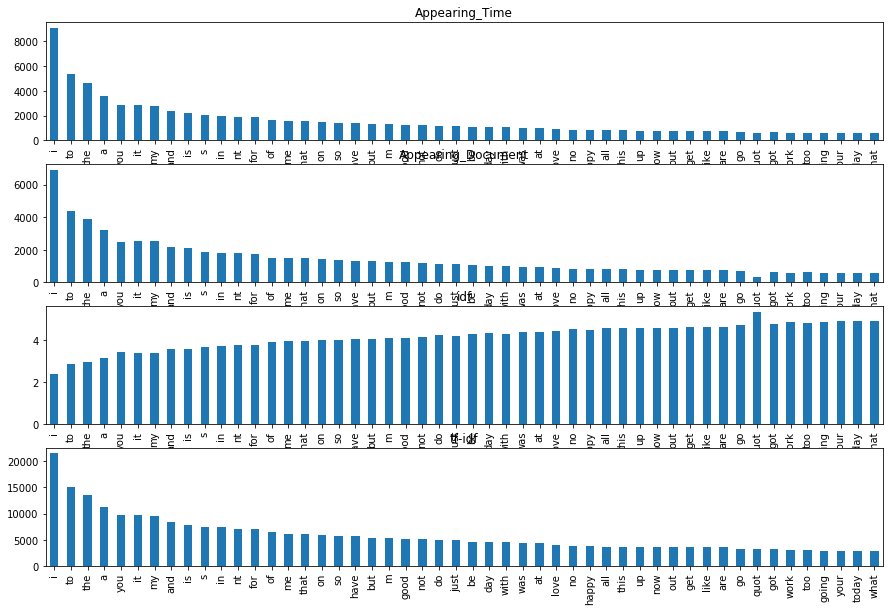

In [17]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [10]:
print(uni_rank)

          frequency  presence        idf        tf-idf
i              9031    6906.0   2.381141  21504.087929
to             5308    4355.0   2.842123  15085.986650
the            4606    3860.0   2.962751  13646.429111
a              3559    3195.0   3.151777  11217.173475
you            2876    2457.0   3.414329   9819.609551
...             ...       ...        ...           ...
bred              1       1.0  10.528285     10.528285
maniacs           1       1.0  10.528285     10.528285
shatter           1       1.0  10.528285     10.528285
chee              1       1.0  10.528285     10.528285
easports          1       1.0  10.528285     10.528285

[16355 rows x 4 columns]


In [11]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/clean_data/train_bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
800.2072129249573


Text(0.5, 1.0, 'tf-idf')

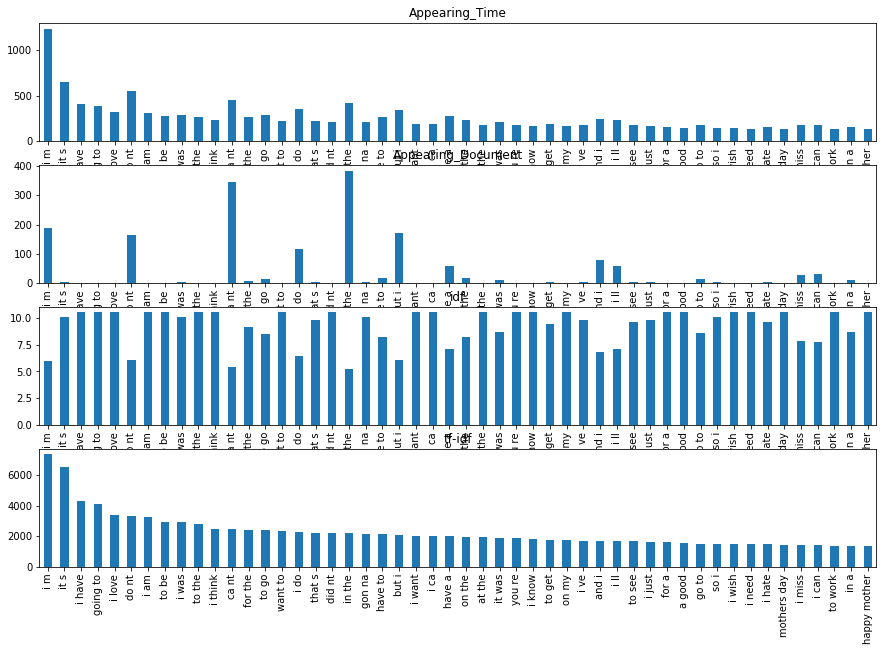

In [18]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [12]:
print(bi_rank)

                   frequency  presence        idf       tf-idf
i m                     1237     189.0   5.974408  7390.342685
it s                     648       2.0  10.122820  6559.587214
i have                   407       1.0  10.528285  4285.011947
going to                 389       1.0  10.528285  4095.502819
i love                   324       1.0  10.528285  3411.164302
...                      ...       ...        ...          ...
s rocking                  1    1183.0   4.144778     4.144778
night america              1    1183.0   4.144778     4.144778
without needing            1    1183.0   4.144778     4.144778
free up                    1    1183.0   4.144778     4.144778
suprisingly could          1    1183.0   4.144778     4.144778

[83108 rows x 4 columns]


check if multi-gram works, N=4

In [13]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/clean_data/train_tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
1161.0994429588318


Text(0.5, 1.0, 'tf-idf')

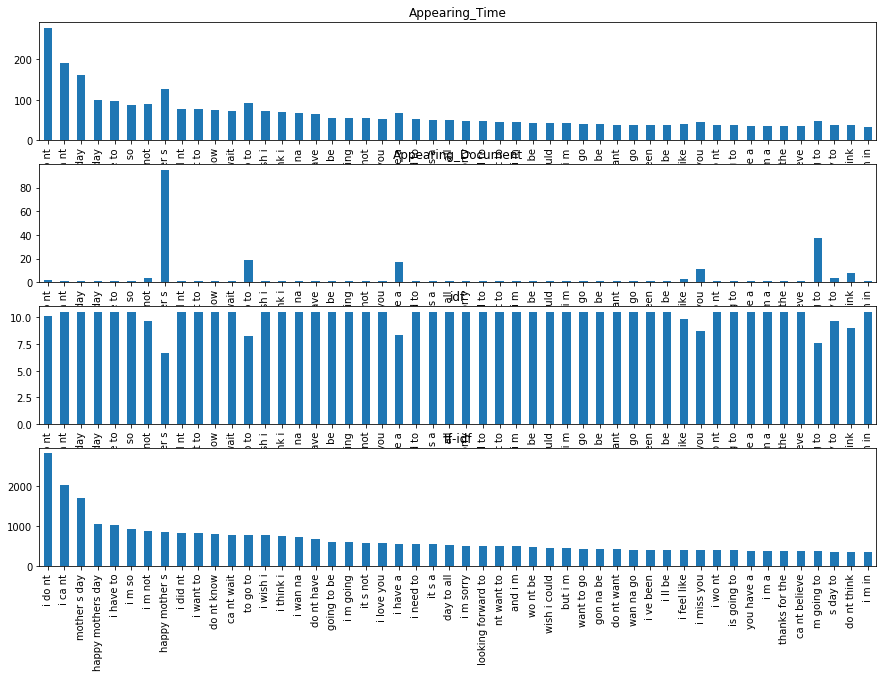

In [19]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [14]:
print(tri_rank)

                    frequency  presence        idf       tf-idf
i do nt                   277       2.0  10.122820  2804.021078
i ca nt                   191       1.0  10.528285  2010.902413
mother s day              161       1.0  10.528285  1695.053866
happy mothers day         100       1.0  10.528285  1052.828488
i have to                  97       1.0  10.528285  1021.243634
...                       ...       ...        ...          ...
actor i love                1     276.0   5.597415     5.597415
guitar some guitar          1     276.0   5.597415     5.597415
is well that                1     276.0   5.597415     5.597415
mammals that can            1     276.0   5.597415     5.597415
does twitter work           1     276.0   5.597415     5.597415

[123697 rows x 4 columns]


In [15]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/clean_data/train_tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
997.1065900325775


Text(0.5, 1.0, 'tf-idf')

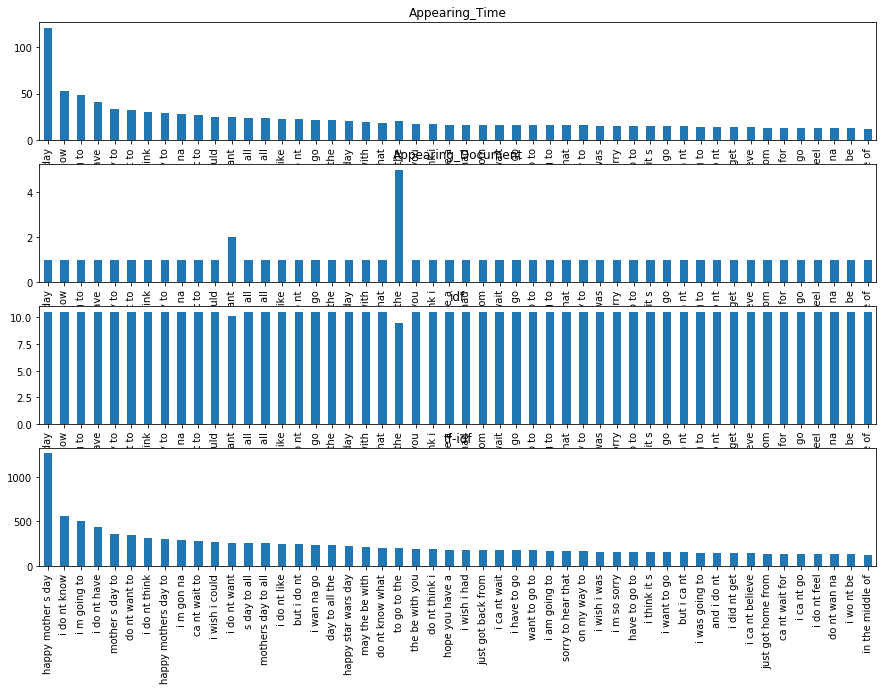

In [20]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [16]:
print(tert_rank)

                           frequency  presence        idf       tf-idf
happy mother s day               120       1.0  10.528285  1263.394186
i do nt know                      53       1.0  10.528285   557.999099
i m going to                      48       1.0  10.528285   505.357674
i do nt have                      41       1.0  10.528285   431.659680
mother s day to                   34       1.0  10.528285   357.961686
...                              ...       ...        ...          ...
love a good yard                   1     120.0   6.425642     6.425642
na follow my dreams                1     120.0   6.425642     6.425642
with that david archuleta          1     120.0   6.425642     6.425642
do nt think s                      1     120.0   6.425642     6.425642
and hardware almost half           1     120.0   6.425642     6.425642

[125420 rows x 4 columns]


## Sentiment: Negative

In [ ]:
negative_path='../data/Negative/Negative_clean_data.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(negative_path)

check if unigram works, N=1

In [ ]:
split_selected_text[:5]

In [ ]:
split_selected_word[:5]

In [ ]:
n_document

In [ ]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/Negative/uni_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(uni_rank)

In [ ]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/Negative/bi_rank')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(bi_rank)

check if multi-gram works, N=3

In [ ]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/Negative/tri_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(tri_rank)

In [ ]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/Negative/tert_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(tert_rank)

## Sentiment: Neutral

In [ ]:
neutral_path='../data/Neutral/Neutral_clean_data.csv'
split_selected_text,split_selected_word,n_document=StaA.filter_out(neutral_path)

check if unigram works, N=1

In [ ]:
split_selected_text[:5]

In [ ]:
split_selected_word[:5]

In [ ]:
n_document

In [ ]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_idf,uni_tf_idf,uni_rank=StaA.ranking(uni_frequency,uni_presence,n_document,uni_gram,'../data/Neutral/uni_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
uni_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
uni_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(uni_rank)

In [ ]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_idf,bi_tf_idf,bi_rank=StaA.ranking(bi_frequency,bi_presence,n_document,bi_gram,'../data/Neutral/bi_rank')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
bi_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
bi_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(bi_rank)

check if multi-gram works, N=3

In [ ]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_idf,tri_tf_idf,tri_rank=StaA.ranking(tri_frequency,tri_presence,n_document,tri_gram,'../data/Neutral/tri_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tri_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tri_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(tri_rank)

In [ ]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_idf,tert_tf_idf,tert_rank=StaA.ranking(tert_frequency,tert_presence,n_document,tert_gram,'../data/Neutral/tert_rank.csv')
end=time.time()
print(end-start)

In [ ]:
# high frequency word
plt.subplot(4,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Time')
plt.subplot(4,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))
plt.title('Appearing_Document')
plt.subplot(4,1,3)
tert_idf.head(50).plot.bar(figsize=(15,10))
plt.title('idf')
plt.subplot(4,1,4)
tert_tf_idf.head(50).plot.bar(figsize=(15,10))
plt.title('tf-idf')

In [ ]:
print(tert_rank)

# Numerify the Text Output of 'Sentiment'

In [ ]:
data_no_missingValue=pd.read_csv('../data/train_no_missingValue.csv')
sentiment=pd.get_dummies(data_no_missingValue['sentiment'])
print(sentiment)

In [ ]:
sentiment.to_csv('../data/train_no_missingValue_numerical_sentiment.csv')

Assigning sentiment information with values.

In [ ]:
from nltk import FreqDist
import pickle
import sys
import utils

In [ ]:
from collections import Counter

In [ ]:
split_selected_text

In [ ]:
hh='../data/Positive/Positive.csv'
pd.read_csv(hh)

In [ ]:
gg='../data/Positive/Positive_clean_data.csv'

In [ ]:
pd.read_csv(gg)